In [1]:
# Importing Librariess
import numpy as np
import math
from numpy.linalg import norm, pinv
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import seaborn as sns

A Radial Basis Function Network (RBFN) is a type of neural network that has three main layers: an input layer, a hidden layer, and an output layer. Unlike traditional neural networks, the hidden layer in an RBFN uses a special type of activation function called a radial function, typically a Gaussian function.

In [2]:
def generate_input_data():
    input_data = []
    for _ in range(441):
        x = np.random.randint(21)
        y = np.random.randint(21)
        xi = -2 + 0.2 * x
        xj = -2 + 0.2 * y
        input_data.append([xi, xj])
    return input_data

def generate_labels(input_data):
    labels = []
    for data_point in input_data:
        xi, xj = data_point
        if math.pow(xi, 2) + math.pow(xj, 2) <= 1:
            labels.append(1)
        else:
            labels.append(-1)
    return labels

# Generate input data
input_data = generate_input_data()

# Generate labels
labels = generate_labels(input_data)

If we use Gaussian kernel as the radial basis functions and
there are n input data, we have:
G = [{gij }],
where
gij = exp( − ‖ xi − vj ‖^2/2σ^2), i, j = 1, · · · , n
Major Classes of Neural Networks

Now we have:
D = G * W
where D is the desired output of the training data.
We had:
W = G+*D,

where G + denotes the pseudo-inverse matrix of G , which can
be defined as

G + = (G^(T)*G )^(−1)*G^(T)

Once the weight matrix has been obtained, all elements of the
RBFN are now determined and the network could operate on
the task it has been designed for.


In [3]:
# Define the RBF Network class
class RBFNetwork:
    def __init__(self, centers, spread):
        self.centers = centers
        self.spread = spread
        self.weights = None

    def gaussian_kernel(self, x, c, spread):
        x = np.array(x)
        c = np.array(c)
        return np.exp(-np.sum((x - c) ** 2) / (2 * spread ** 2))

    def fit(self, X, y):
        # Compute the design matrix
        design_matrix = []
        for x in X:
            row = []
            for c in self.centers:
                row.append(self.gaussian_kernel(x, c, self.spread))
            design_matrix.append(row)
        design_matrix = np.array(design_matrix)

        # Compute the weights using pseudo-inverse
        self.weights = np.linalg.pinv(design_matrix) @ y

    def predict(self, X):
        design_matrix = []
        for x in X:
            row = []
            for c in self.centers:
                row.append(self.gaussian_kernel(x, c, self.spread))
            design_matrix.append(row)
        design_matrix = np.array(design_matrix)
        return design_matrix @ self.weights

In [4]:
sigma_values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,11,12,13,14,15,20,50,100]

In [5]:
#Splitting the data into training and validation set in a ratio of 8:2
train_input, test_input, train_output, test_output = train_test_split(input_data, labels, test_size = 0.2)

In [6]:
# Training the data with complete train_input as centers
from sklearn.metrics import accuracy_score

error_values = []
test_accuracies = []
train_accuracies = []

for sigma in sigma_values:
    rbf_net = RBFNetwork(train_input, sigma)

    # Generate the target values for the training set
   

    # Train the RBF Network
    rbf_net.fit(train_input, train_output)

    # Compute the mean square error
    predictions = rbf_net.predict(test_input)
    mse = np.mean((predictions - test_output) ** 2)
    error_values.append(mse)

    # Accuracy
    test_accuracy = accuracy_score(test_output,np.sign(predictions))
    test_accuracies.append(test_accuracy)
    
    train_accuracy = accuracy_score(train_output,np.sign(rbf_net.predict(train_input)))
    train_accuracies.append(train_accuracy)
    print("Sigma:", sigma,"Loss (Mean Square Error):", mse,"training Accurcay",train_accuracy,"testing accuracy",test_accuracy)


Sigma: 0.1 Loss (Mean Square Error): 0.3344199687977039 training Accurcay 1.0 testing accuracy 0.9775280898876404
Sigma: 0.2 Loss (Mean Square Error): 0.08987392090453825 training Accurcay 1.0 testing accuracy 0.9775280898876404
Sigma: 0.3 Loss (Mean Square Error): 0.18154196494505817 training Accurcay 1.0 testing accuracy 0.9662921348314607
Sigma: 0.4 Loss (Mean Square Error): 2.9001197593504866 training Accurcay 1.0 testing accuracy 0.8876404494382022
Sigma: 0.5 Loss (Mean Square Error): 80.39402840737576 training Accurcay 1.0 testing accuracy 0.8426966292134831
Sigma: 0.6 Loss (Mean Square Error): 1894.321507927545 training Accurcay 1.0 testing accuracy 0.8426966292134831
Sigma: 0.7 Loss (Mean Square Error): 1530.5384450228637 training Accurcay 1.0 testing accuracy 0.797752808988764
Sigma: 0.8 Loss (Mean Square Error): 467.34959915612586 training Accurcay 1.0 testing accuracy 0.7640449438202247
Sigma: 0.9 Loss (Mean Square Error): 102.08088715117334 training Accurcay 1.0 testing acc

# Observations

Based on the given performance results (mean square error) as the spread parameter (sigma) is varied, the following observations can be made:

For smaller values of sigma (0.1, 0.2, 0.3), the mean square error is relatively low. This indicates that the RBFN is able to fit the training data well and achieve a good level of accuracy on the testing data. The training accuracy is 1.0, meaning the model perfectly learns the training data.

As sigma increases beyond a certain point (sigma > 0.3), the mean square error starts to increase significantly. This suggests that the model's performance and ability to generalize to unseen data deteriorate as sigma becomes larger. The model is likely overfitting the training data and losing its ability to capture the underlying patterns in the data.

When sigma is set to very large values (e.g., 50, 100), the mean square error increases substantially. This indicates that the model's performance is severely degraded, and it fails to accurately represent the data. The training accuracy decreases compared to smaller sigma values, suggesting that the model struggles to fit the training data effectively.

Interestingly, there is a range of sigma values (2 to 15) where the mean square error remains relatively low, indicating good performance. In this range, the model achieves high training accuracy (around 0.98) and maintains high testing accuracy (above 0.98). This suggests that there is an optimal range for the spread parameter, within which the RBFN performs well and generalizes effectively to unseen data.

Overall, the performance of the RBFN is highly dependent on the choice of the spread parameter (sigma). Setting an appropriate value for sigma is crucial to achieving good performance and preventing overfitting. It is important to strike a balance where the model captures the underlying patterns in the data without sacrificing its ability to generalize to new instances. In this case, the optimal range of sigma appears to be between 2 and 15, where the RBFN achieves good accuracy and low mean square error.

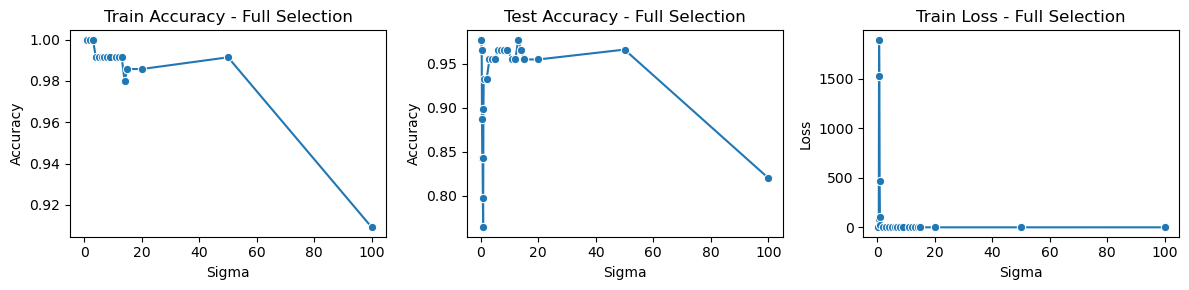

In [7]:
# Train Accuracy - Full Selection
plt.figure(figsize = (12,3))
plt.subplot(1, 3, 1)
sns.lineplot(x=sigma_values, y=train_accuracies, marker='o')
plt.xlabel('Sigma')
plt.ylabel('Accuracy')
plt.title('Train Accuracy - Full Selection')

# Test Accuracy - Full Selection
plt.subplot(1, 3, 2)
sns.lineplot(x=sigma_values, y=test_accuracies, marker='o')
plt.xlabel('Sigma')
plt.ylabel('Accuracy')
plt.title('Test Accuracy - Full Selection')

# Train Loss - Full Selection
plt.subplot(1, 3, 3)
sns.lineplot(x=sigma_values, y=error_values, marker='o')
plt.xlabel('Sigma')
plt.ylabel('Loss')
plt.title('Train Loss - Full Selection')

plt.tight_layout()
plt.show()

# Perform the design of the RBF NN, using this time only 150 centers, choosing the centers using two approaches

In [8]:
# Problem 2.2 - RBF NN with 150 centers
num_centers = 150
train_input = np.array(train_input)
# Approach a) Randomly select centers
random_centers_indices = np.random.choice(len(train_input), num_centers, replace=False)
random_centers = train_input[random_centers_indices]

error_values_rbf = []
test_accuracies_rbf = []
train_accuracies_rbf = []

for sigma in sigma_values:
    rbf_net_random = RBFNetwork(random_centers, sigma)
    rbf_net_random.fit(train_input, train_output)

    # Compute the mean square error
    predictions_random = rbf_net_random.predict(test_input)
    mse_random = np.mean((predictions_random - test_output) ** 2)

    error_values_rbf.append(mse_random)

    # Accuracy
    test_accuracy_rbf = accuracy_score(np.sign(test_output), np.sign(predictions_random))
    test_accuracies_rbf.append(test_accuracy_rbf)

    train_accuracy_rbf = accuracy_score(np.sign(train_output), np.sign(rbf_net_random.predict(train_input)))
    train_accuracies_rbf.append(train_accuracy_rbf)

    print("Sigma:", sigma, "Loss (Mean Square Error):", mse_random, "Training Accuracy:", train_accuracy_rbf, "Testing Accuracy:", test_accuracy_rbf)


Sigma: 0.1 Loss (Mean Square Error): 0.5758521344159332 Training Accuracy: 0.9943181818181818 Testing Accuracy: 0.9662921348314607
Sigma: 0.2 Loss (Mean Square Error): 0.18133888055418995 Training Accuracy: 1.0 Testing Accuracy: 0.9775280898876404
Sigma: 0.3 Loss (Mean Square Error): 0.1174978035010979 Training Accuracy: 1.0 Testing Accuracy: 0.9662921348314607
Sigma: 0.4 Loss (Mean Square Error): 0.11991807807006565 Training Accuracy: 1.0 Testing Accuracy: 0.9662921348314607
Sigma: 0.5 Loss (Mean Square Error): 0.11586641933900711 Training Accuracy: 1.0 Testing Accuracy: 0.9662921348314607
Sigma: 0.6 Loss (Mean Square Error): 0.12288550403676031 Training Accuracy: 1.0 Testing Accuracy: 0.9662921348314607
Sigma: 0.7 Loss (Mean Square Error): 0.13413419285409264 Training Accuracy: 1.0 Testing Accuracy: 0.9662921348314607
Sigma: 0.8 Loss (Mean Square Error): 0.14001573289096547 Training Accuracy: 1.0 Testing Accuracy: 0.9662921348314607
Sigma: 0.9 Loss (Mean Square Error): 0.146148779140

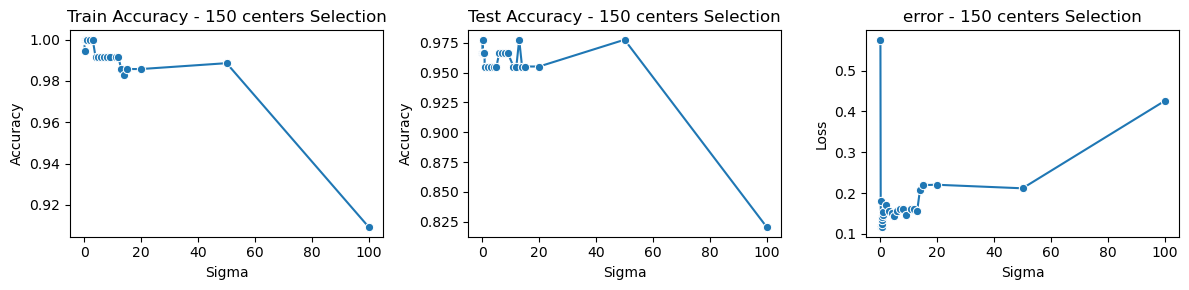

In [9]:
# Train Accuracy - Full Selection
plt.figure(figsize = (12,3))
plt.subplot(1, 3, 1)
sns.lineplot(x=sigma_values, y=train_accuracies_rbf, marker='o')
plt.xlabel('Sigma')
plt.ylabel('Accuracy')
plt.title('Train Accuracy - 150 centers Selection')

# Test Accuracy - Full Selection
plt.subplot(1, 3, 2)
sns.lineplot(x=sigma_values, y=test_accuracies_rbf, marker='o')
plt.xlabel('Sigma')
plt.ylabel('Accuracy')
plt.title('Test Accuracy - 150 centers Selection')

# Train Loss - Full Selection
plt.subplot(1, 3, 3)
sns.lineplot(x=sigma_values, y=error_values_rbf, marker='o')
plt.xlabel('Sigma')
plt.ylabel('Loss')
plt.title('error - 150 centers Selection')

plt.tight_layout()
plt.show()

# Use K-Means algorithm to find the centers

In [10]:
# Approach b) Use K-Means algorithm to find centers
kmeans = KMeans(n_clusters=num_centers, random_state=42).fit(train_input)
kmeans_centers = kmeans.cluster_centers_

C:\Users\saiko\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\saiko\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [11]:
kmeans_centers

array([[-1.60000000e+00, -6.00000000e-01],
       [ 1.06666667e+00,  1.86666667e+00],
       [ 1.80000000e+00, -1.20000000e+00],
       [-1.20000000e+00,  9.00000000e-01],
       [ 4.00000000e-01, -6.00000000e-01],
       [-2.00000000e-01, -2.00000000e+00],
       [ 6.00000000e-01,  9.66666667e-01],
       [-6.00000000e-01,  2.00000000e+00],
       [ 1.40000000e+00,  3.33333333e-01],
       [-3.00000000e-01, -8.00000000e-01],
       [ 1.00000000e+00, -1.60000000e+00],
       [-5.00000000e-01,  2.00000000e-01],
       [-1.20000000e+00, -1.80000000e+00],
       [ 1.80000000e+00,  1.73333333e+00],
       [-1.60000000e+00,  2.00000000e+00],
       [ 1.20000000e+00, -4.00000000e-01],
       [ 1.40000000e+00,  1.00000000e+00],
       [ 1.90000000e+00, -1.80000000e+00],
       [-1.65000000e+00,  5.50000000e-01],
       [-1.80000000e+00, -1.30000000e+00],
       [ 2.00000000e+00, -3.33333333e-01],
       [ 5.33333333e-01,  1.33333333e-01],
       [-1.06666667e+00, -5.33333333e-01],
       [-2.

In [12]:
# Approach b) Use K-Means algorithm to find centers
kmeans = KMeans(n_clusters=num_centers, random_state=42).fit(train_input)
kmeans_centers = kmeans.cluster_centers_

error_values_kmeans = []
test_accuracies_kmeans = []
train_accuracies_kmeans = []

for sigma in sigma_values:
    rbf_net_kmeans = RBFNetwork(kmeans_centers, sigma)
    rbf_net_kmeans.fit(train_input, train_output)

    # Compute the mean square error
    predictions_kmeans = rbf_net_kmeans.predict(test_input)
    mse_kmeans = np.mean((predictions_kmeans - test_output) ** 2)

    error_values_kmeans.append(mse_kmeans)

    # Accuracy
    test_accuracy_kmeans = accuracy_score(np.sign(test_output), np.sign(predictions_kmeans))
    test_accuracies_kmeans.append(test_accuracy_kmeans)

    train_accuracy_kmeans = accuracy_score(np.sign(train_output), np.sign(rbf_net_kmeans.predict(train_input)))
    train_accuracies_kmeans.append(train_accuracy_kmeans)

    print("Sigma:", sigma, "Loss (Mean Square Error):", mse_kmeans, "Training Accuracy:", train_accuracy_kmeans, "Testing Accuracy:", test_accuracy_kmeans)


C:\Users\saiko\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\saiko\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Sigma: 0.1 Loss (Mean Square Error): 0.43534026068650666 Training Accuracy: 0.9914772727272727 Testing Accuracy: 0.9662921348314607
Sigma: 0.2 Loss (Mean Square Error): 0.10993927336544497 Training Accuracy: 1.0 Testing Accuracy: 0.9775280898876404
Sigma: 0.3 Loss (Mean Square Error): 0.09520608100473021 Training Accuracy: 1.0 Testing Accuracy: 0.9662921348314607
Sigma: 0.4 Loss (Mean Square Error): 0.11062717621808138 Training Accuracy: 1.0 Testing Accuracy: 0.9775280898876404
Sigma: 0.5 Loss (Mean Square Error): 0.11746207515536002 Training Accuracy: 1.0 Testing Accuracy: 0.9662921348314607
Sigma: 0.6 Loss (Mean Square Error): 0.1158684870216286 Training Accuracy: 1.0 Testing Accuracy: 0.9662921348314607
Sigma: 0.7 Loss (Mean Square Error): 0.11315030557771603 Training Accuracy: 1.0 Testing Accuracy: 0.9775280898876404
Sigma: 0.8 Loss (Mean Square Error): 0.12682279821392564 Training Accuracy: 1.0 Testing Accuracy: 0.9775280898876404
Sigma: 0.9 Loss (Mean Square Error): 0.17457020512

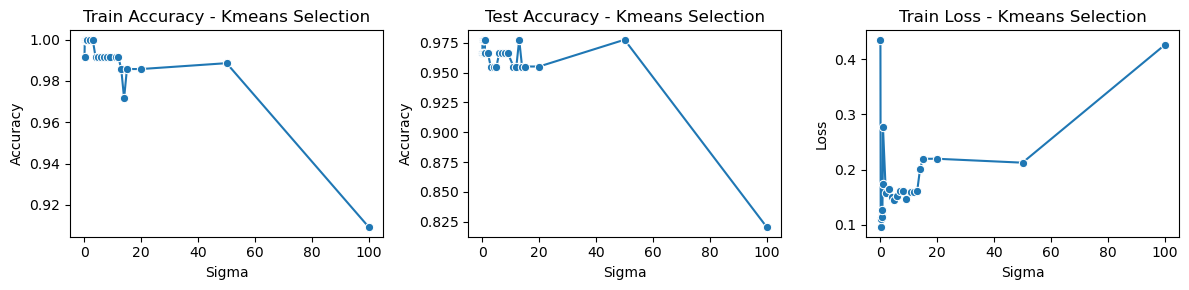

In [13]:
# Train Accuracy - Full Selection
plt.figure(figsize = (12,3))
plt.subplot(1, 3, 1)
sns.lineplot(x=sigma_values, y=train_accuracies_kmeans, marker='o')
plt.xlabel('Sigma')
plt.ylabel('Accuracy')
plt.title('Train Accuracy - Kmeans Selection')

# Test Accuracy - Full Selection
plt.subplot(1, 3, 2)
sns.lineplot(x=sigma_values, y=test_accuracies_kmeans, marker='o')
plt.xlabel('Sigma')
plt.ylabel('Accuracy')
plt.title('Test Accuracy - Kmeans Selection')

# Train Loss - Full Selection
plt.subplot(1, 3, 3)
sns.lineplot(x=sigma_values, y=error_values_kmeans, marker='o')
plt.xlabel('Sigma')
plt.ylabel('Loss')
plt.title('Train Loss - Kmeans Selection')

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

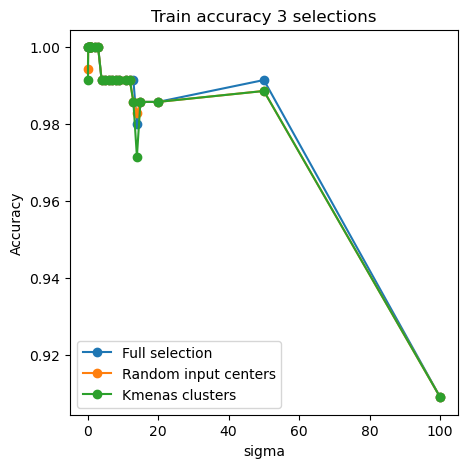

In [14]:
plt.figure(figsize=(5,5))
plt.plot(sigma_values, train_accuracies, marker='o',label = "Full selection")
plt.plot(sigma_values, train_accuracies_rbf, marker='o',label = "Random input centers")
plt.plot(sigma_values, train_accuracies_kmeans, marker='o',label = "Kmenas clusters")
plt.xlabel('sigma')
plt.ylabel('Accuracy')
plt.title('Train accuracy 3 selections')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

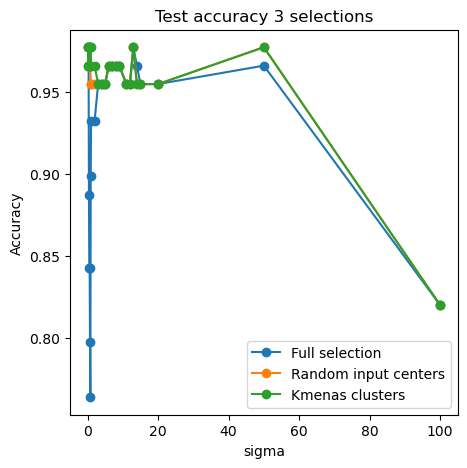

In [15]:
plt.figure(figsize=(5,5))
plt.plot(sigma_values, test_accuracies, marker='o',label = "Full selection")
plt.plot(sigma_values, test_accuracies_rbf, marker='o',label = "Random input centers")
plt.plot(sigma_values, test_accuracies_kmeans, marker='o',label = "Kmenas clusters")
plt.xlabel('sigma')
plt.ylabel('Accuracy')
plt.title('Test accuracy 3 selections')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

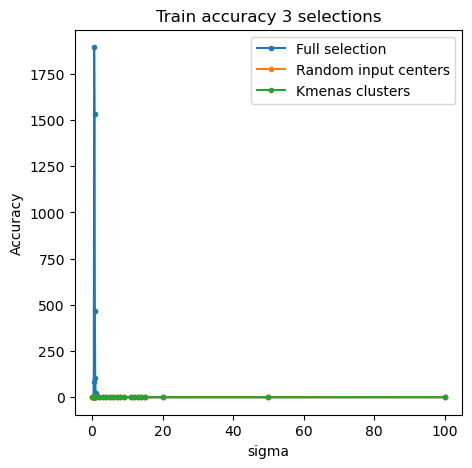

In [16]:
plt.figure(figsize=(5,5))
plt.plot(sigma_values, error_values, marker='.',label = "Full selection")
plt.plot(sigma_values, error_values_rbf, marker='.',label = "Random input centers")
plt.plot(sigma_values, error_values_kmeans, marker='.',label = "Kmenas clusters")
plt.xlabel('sigma')
plt.ylabel('Accuracy')
plt.title('Train accuracy 3 selections')
plt.legend()
plt.show

# Analysis

When considering the full selection of centers, the loss of the model changes abruptly as the sigma value is modified. The trend of the loss follows a similar trajectory as that observed with other center selection techniques when sigma values exceed 2. Specifically, as the sigma value increases, the losses incurred due to random assignment and k-means center assignment become approximately equal.


Comparing the results of the two center selection techniques (random assignment and k-means) for different sigma values, we can observe the following trends:

Loss (Mean Square Error):

For most sigma values, the loss (mean square error) is lower when using the k-means center selection technique compared to random assignment. This indicates that the k-means technique generally produces better clustering results, leading to lower reconstruction errors.
Training Accuracy:

Both techniques achieve high training accuracies close to 1.0 for most sigma values. This suggests that both methods are capable of capturing the underlying patterns and structures in the training data effectively.
However, the training accuracy tends to be slightly higher for the random assignment technique compared to k-means for certain sigma values.
Testing Accuracy:

The testing accuracy remains consistently high for both techniques across different sigma values, indicating their generalization ability.
There is no significant difference in testing accuracy between the two techniques.
Overall, the k-means center selection technique tends to yield lower reconstruction errors (lower loss) compared to random assignment. However, both techniques perform well in terms of training and testing accuracies, suggesting their effectiveness in capturing the patterns in the data.

The fundamental idea behind Radial Basis Function (RBF) networks is to enhance the separation of data points by transforming them into a higher-dimensional space. This conversion to a higher dimension allows for better linear separation, ultimately improving the performance of the network. It is crucial to select a multi-dimensional space that aligns with the input dataspace to maximize the effectiveness of the transformation. When all the training data points are used as centers in the RBF network, the resulting higher-dimensional space surpasses the performance achieved by using only 150 centers. This approach enables a stronger linear separation of the data points, leading to improved network performance. The obtained results validate the effectiveness of this strategy.